# Importation et extraction des données

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_titanic = pd.read_csv("../data/train.csv")
not_interesting = ["Embarked", "Cabin", "Ticket", "Embarked", "Name"]

print(df_titanic.columns)
df_titanic.describe()


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# 1. Étude des variables par rapport à la variable cible

In [16]:
from sklearn.preprocessing import LabelEncoder
def visualize_dist(feature):
    sns.boxplot(df_titanic, x =feature, hue="Survived", color="blue")
    plt.show()
    return 0
df_titanic.drop(not_interesting, axis=1, inplace=True)
df_titanic["Sex"] = LabelEncoder().fit_transform(df_titanic["Sex"])


## 1.1 Relation entre les variables et la variable cible

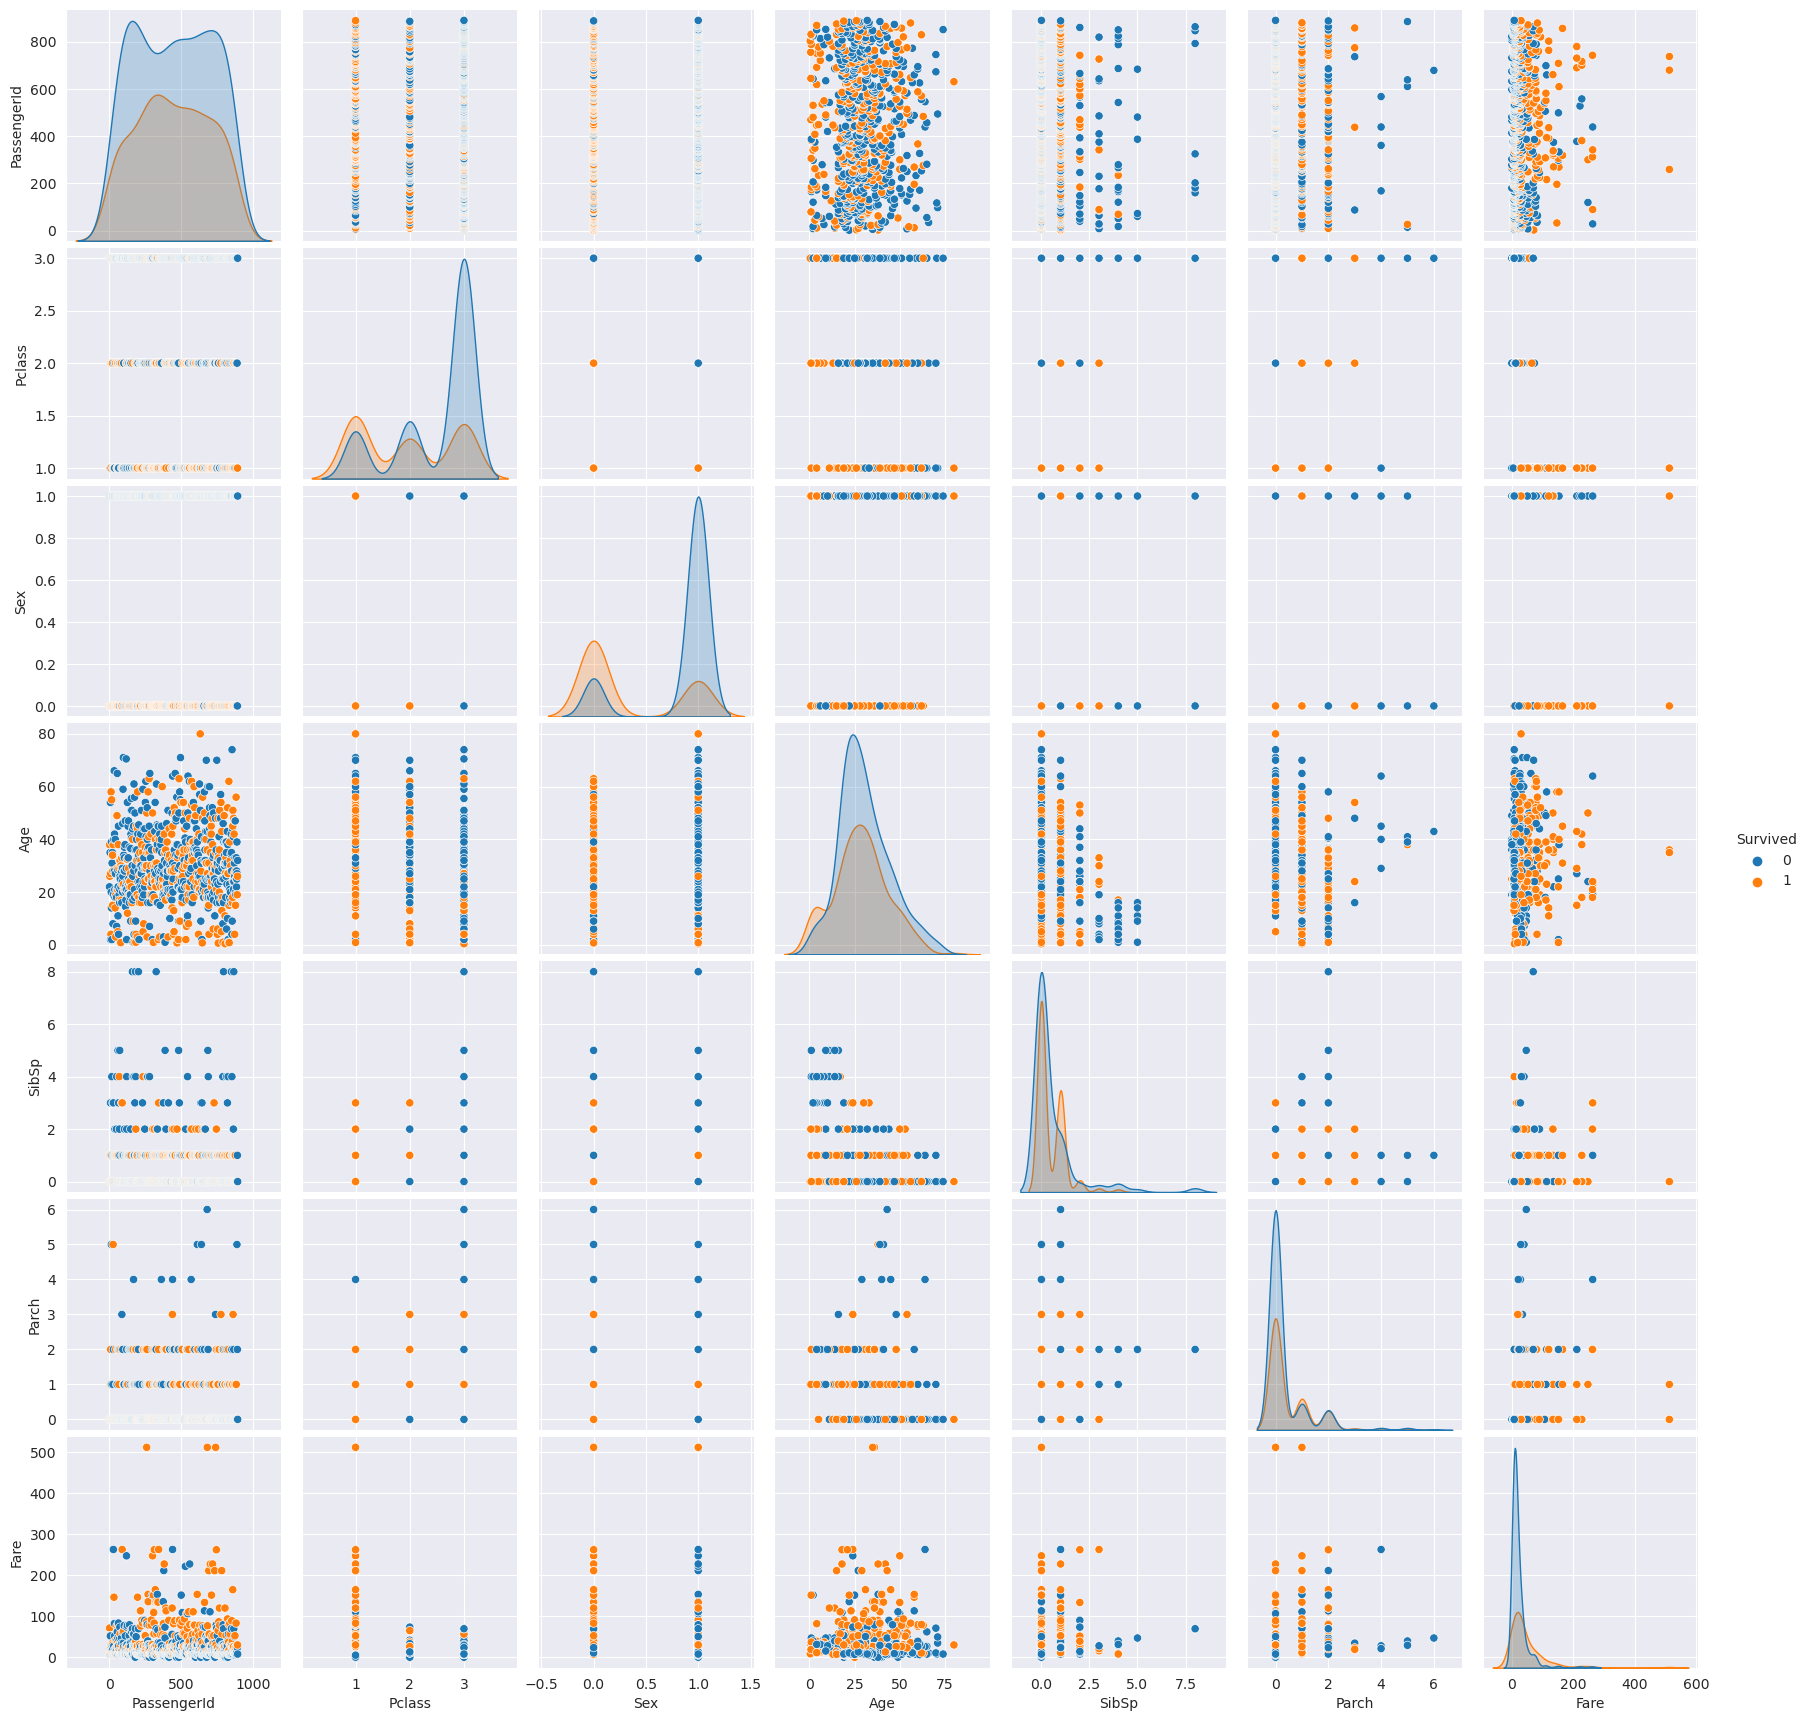

In [18]:
sns.pairplot(df_titanic, hue="Survived")

## 1.1 Corrélation

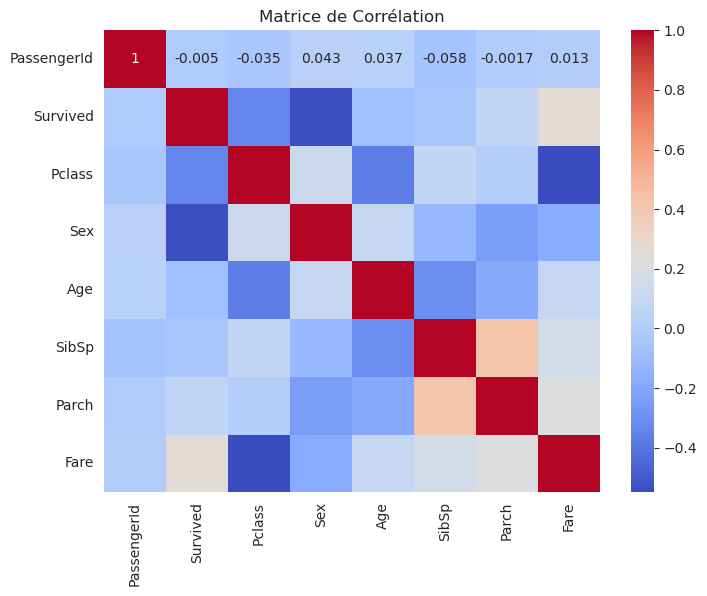

In [31]:
#Corrélation
corr_matrix = df_titanic.corr()

#Matrice de corrélation
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Matrice de Corrélation")
plt.show()

## Ajout de valeurs manquant dans la colonne Age

In [32]:
from sklearn.impute import IterativeImputer

imputer = IterativeImputer()
imputer_data = imputer.fit_transform(df_titanic)
imputer_df = pd.DataFrame(imputer_data, columns= df_titanic.columns)
imputer_df[['Age']].count()

Age    891
dtype: int64